## M345SC 2019 Lab 5

### Task 1: Connected components

A connected component of a graph is a set of nodes where there is at least one path between any pair of nodes in the set. A graph may contain several connected components, and the aim of this task is to assign a distinct numerical label to all nodes belonging to the same component. So, if a graph with 5 nodes has links: 0-1, 1-2, 3-4, then nodes 0,1,2 would be labeled belonging to component "0" and nodes 3,4 would be assigned to component "1". 

The basic algorithm is as follows:

* Initialize numerical label to 0
* Loop through all nodes in graph
* if current node has not been explored
  * Assign numerical label to current node and label it as explored
  * Find all nodes reachable from current node, label them as explored and assign numerical label to them
  * Increment numerical label



1. Implement this algorithm in the cell below so that it takes a networkx graph as input and creates a list, Lconnect, where Lconnect[i] is the label for the connected component that node i belongs to. You may assume that nodes have 
been numbered from 0 to N-1. You have been provided with a function that implements depth-first search.

In [1]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


In [2]:
def dfs(G,s):
    """
    Input:
    G: networkx graph
    s: source node
    Find reachable nodes using DFS
    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1]

    Q=[]
    Q.append(s)
    L2[s]=1

    while len(Q)>0:
        x = Q.pop()
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v)
                L2[v]=1
            #print("v=",v)
            #print("Q=",Q)
    return L2

def connect(G):
    """Find connected components of G and label nodes appropriately
    in list, Lconnect.
    """
    Lconnect = [0 for n in G.nodes()]
    label=0
    #Add code here
    
    Lexplore = [0 for n in G.nodes()]
    #Iterate through nodes of G
    #If node is unexplored, run dfs on node and increment label
    for n in G.nodes():
        if Lexplore[n]==0:
            L2 = dfs(G,n)
            for i,l in enumerate(L2):
                if l==1:
                    Lexplore[i]=1
                    Lconnect[i]=label
            label=label+1

    return Lconnect

2. Generate a random graph with multiple connected components and verify that your code is correct. What is the running time of your routine? 

Lc= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
n = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


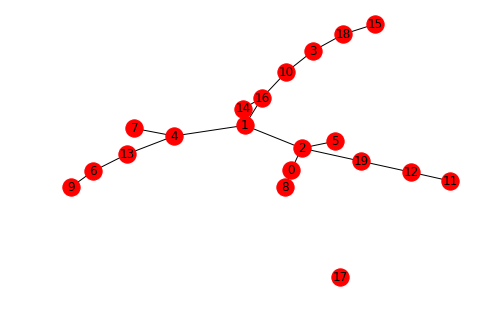

In [10]:
#Add code here
G = nx.erdos_renyi_graph(20,0.1)
nx.draw(G,with_labels=True)
Lc = connect(G)
print("Lc=",Lc)
print("n =",list(G.nodes()))

### Task 2: Numerical solution of an initial value problem

You will now use *odeint* from scipy.integrate to solve the following IVP:

$\frac{dy_1}{dt} =  y_2 $

$\frac{dy_2}{dt} = -\omega^2 y_1$

$y_1(0)=1, ~ y_2(0)=0$

and $\omega$ is a parameter that must be specified

1) Create a function named RHS which takes y,t, and $\omega$ as input and returns dy/dt. Note that y and dy/dt should each contain two elements

In [11]:
#Add code here
def RHS(y,t,w):
    return (y[1],-w**2*y[0])

2) Now, i) set the variable, y0, to the initial condition, ii) assign a value to $\omega$, and iii) create an array of times between 0 and 1 (inclusive) at which the solution will be computed

In [14]:
import numpy as np
#Add code here
y0 = (1,0)
w = 1
t = np.linspace(0,4*np.pi/w,101)

3) If the previous tasks have been completed correctly, the code below will solve the IVP and return the solution in the array, y

In [17]:
%pylab inline
from scipy.integrate import odeint
y = odeint(RHS,y0,t,args=(w,))

Populating the interactive namespace from numpy and matplotlib


4) What are the dimensions of y? Plot your solution for $y_1(t)$. Compute the error, $\epsilon(t) = |y_1-y_{1,exact}|$. Is it what you expect? Can you reduce it? For the last part, it may be helpful to look at the online documentation for *odeint*. 

shape= (101, 2)


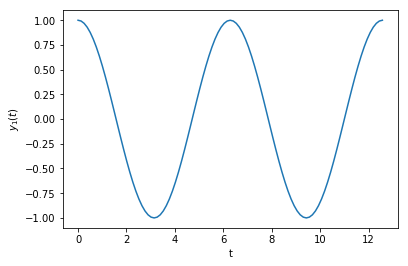

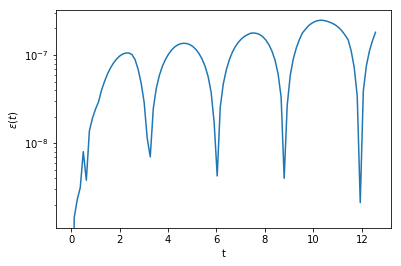

In [18]:
#Add code here
print("shape=",y.shape)
plt.figure()
plt.plot(t,y[:,0])
plt.xlabel('t')
plt.ylabel('$y_1(t)$')
error = np.abs(np.cos(w*t)-y[:,0])
plt.figure()
plt.semilogy(t,error)
plt.xlabel('t')
plt.ylabel('$\epsilon (t)$')
plt.show()

Adjusting the error tolerances via the call to odeint will change the error (and the walltime):

In [19]:
y = odeint(RHS,y0,t,args=(w,),rtol=1e-12,atol=1e-12)

shape= (101, 2)


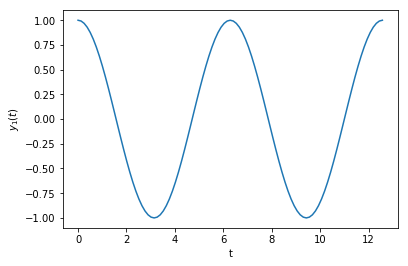

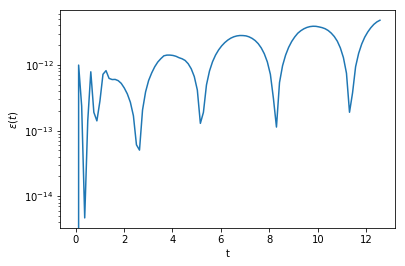

In [20]:
#Add code here
print("shape=",y.shape)
plt.figure()
plt.plot(t,y[:,0])
plt.xlabel('t')
plt.ylabel('$y_1(t)$')
error = np.abs(np.cos(w*t)-y[:,0])
plt.figure()
plt.semilogy(t,error)
plt.xlabel('t')
plt.ylabel('$\epsilon (t)$')
plt.show()